### Lista 2 - Extragaláctica

Andressa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpmath
from astropy.table import Table
from scipy.optimize import curve_fit
from scipy.integrate import quad

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 15

Exercício 4

a)

In [2]:
d = 206265
d #pc

206265

In [3]:
mag_sun = 4.83
mi_0 = 5*np.log10(d) -5 +mag_sun

mi_0 = round(mi_0,1)
mi_0

26.4

In [4]:
mi = 17 #mag/arcsec²

log_sigma = (mi - mi_0)/(-2.5)
sigma = 10**log_sigma
sigma = round(sigma, 1)

sigma #Lsun/pc²

5754.4

b)

In [7]:
L_sun = 1 #Lsun
M = 2.5

In [8]:
L = L_sun * 10**((M-mag_sun)/(-2.5))
L #Lsun

8.550667128846834

In [9]:
sigma/L #stars/pc²

672.9767295684744

Exercício 6

a)

In [10]:
x = 1.35
m1 = 0.1
m2 = 100

c = ((x*m1**x)/(1-(m1/m2)**x))

In [11]:
c = round(c,3)
c

0.06

b)

In [12]:
m1 = 0.1
m2 = 100
m = np.arange(m1, m2, 0.1)

In [13]:
def integral(m):
    return m**(-(1+x))

def integral2(m):
    return m* m**(-(1+x))

In [14]:
valor, erro = quad(integral, m1, m2)
denominador = c * valor
#print(denominador)

valor, erro = quad(integral2, m1, m2)
numerador = c * valor
#print(numerador)

m_media = round(numerador/denominador, 2)
print(f'A massa média das estrelas é {m_media} Msun')

A massa média das estrelas é 0.35 Msun


c)

In [15]:
m1 = 0.1
m2 = 1
m = np.arange(m1, m2, 0.1)

In [16]:
valor, erro = quad(integral, m1, m2)
imf = c * valor
imf = round(imf, 2)
print(f'A fração de estrelas com massa menor que 1 Msun é {imf}')

A fração de estrelas com massa menor que 1 Msun é 0.95


d)

In [17]:
m1 = 8
m2 = 100
m = np.arange(m1, m2, 0.1)

In [18]:
valor, erro = quad(integral, m1, m2)
imf = c * valor
imf = round(imf, 3)
print(f'A fração de estrelas com massa maior de 8 Msun é {imf}')

A fração de estrelas com massa maior de 8 Msun é 0.003


Exercício 7

a)

In [19]:
lv_M0 = 0.06
lv_A0 = 80
lv_O5 = 2.5*10**5

cor_M0 = 1.45
cor_A0 = 0.0
cor_O5 = -0.35

In [20]:
lb_M0 = lv_M0 * 10 **((cor_M0 - 0.75)/-2.5)
lb_A0 = lv_A0 * 10 **((cor_A0 - 0.75)/-2.5)
lb_O5 = lv_O5 * 10 **((cor_O5 - 0.75)/-2.5)

print(lb_M0, lb_A0, lb_O5)

0.031488447614986356 159.62098519751035 688557.1758345417


In [21]:
m_M0 = np.arange(0.1, 0.5, 0.1)
m_A0 = np.arange(0.5, 4, 0.1)
m_O5 = np.arange(4, 40, 0.1)

x = 1.35

def M0(m_M0):
    return m_M0**(-(1+x))

def A0(m_A0):
    return m_A0**(-(1+x))

def O5(m_O5):
    return m_O5**(-(1+x))

In [22]:
valor_M0, erro = quad(M0, 0.1, 0.5)
imf_M0 = c * valor_M0
imf_M0 = round(imf_M0, 3)
print(f'A fração de estrelas M0 é {imf_M0}')

valor_A0, erro = quad(A0, 0.5, 4)
imf_A0 = c * valor_A0
imf_A0 = round(imf_A0, 3)
print(f'A fração de estrelas A0 é {imf_A0}')

valor_O5, erro = quad(O5, 4, 40)
imf_O5 = c * valor_O5
imf_O5 = round(imf_O5, 3)
print(f'A fração de estrelas O0 é {imf_O5}')

A fração de estrelas M0 é 0.882
A fração de estrelas A0 é 0.106
A fração de estrelas O0 é 0.007


In [23]:
lv = imf_M0 * lv_M0 + imf_A0 * lv_A0 + imf_O5 * lv_O5
lb = imf_M0 * lb_M0 + imf_A0 * lb_A0 + imf_O5 * lb_O5
cor = 0.75 - 2.5 * np.log10(lb/lv)
cor = round(cor, 2)
cor

-0.35

b)

In [24]:
lv = imf_M0 * lv_M0 + imf_A0 * lv_A0
lb = imf_M0 * lb_M0 + imf_A0 * lb_A0
cor = 0.75 - 2.5 * np.log10(lb/lv)
cor = round(cor, 3)
cor

0.005

Exercício 8

In [27]:
pico = 14.8 #na banda B
M = -19.3 #na banda V?

d = 10 **((pico - M + 5)/5)
d = d/1e6 
d #Mpc

66.06934480075964

Exercício 9

```sql
select p.objid, p.ra, p.dec, p.u, p.g, p.r, p.i, p.z, s.z as redshift
from galaxy p, specobj s
where p.objid=s.bestobjid and p.g < 18
and s.z BETWEEN 0.001 AND 0.02
````

i

In [235]:
teste = Table.read('ssds.fits', format='fits')
print(teste.colnames)

['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']


In [236]:
len(teste)

11327

ii

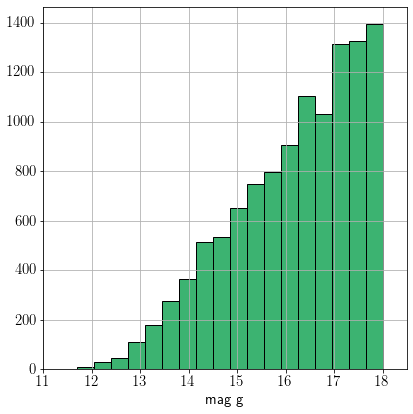

In [237]:
mag_ap = np.array(teste['g'])

plt.figure(figsize=[6,6])
bins = np.linspace(11,18,21)
plt.hist(mag_ap, bins=bins, ec="black", fc="mediumseagreen")
plt.xlabel("mag g")
plt.xlim(11, 18.5)
plt.grid(True)
plt.tight_layout()

iii

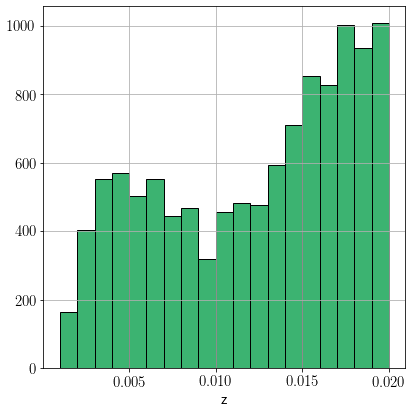

In [238]:
z = np.array(teste['redshift'])

plt.figure(figsize=[6,6])
bins = np.linspace(0.001,0.02,20)
plt.hist(z, bins=bins, ec="black", fc="mediumseagreen")
plt.xlabel("z")
plt.grid(True)
plt.tight_layout()

iv

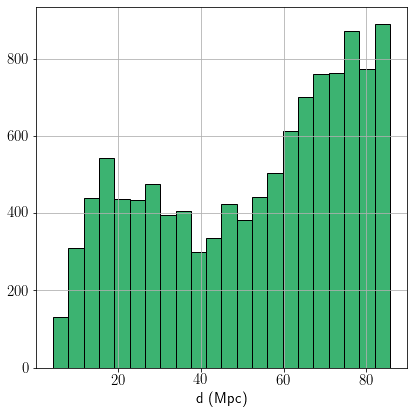

In [239]:
H0 = 70 #km/s/Mpc
c = 3e5 #km/s
d = (c/H0)*z #Mpc

#bins = np.linspace(0,5,20)
plt.figure(figsize=[6,6])
plt.hist(d, bins='auto', ec="black", fc="mediumseagreen")
plt.xlabel("d (Mpc)")
plt.grid(True)
plt.tight_layout()

v

In [240]:
dist = np.array(d)

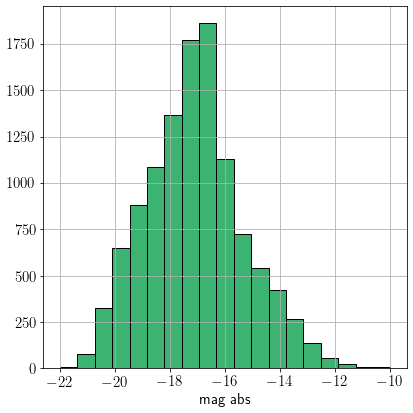

In [241]:
dist = dist *1e6
mag_ap = teste['g']
mag = mag_ap -5*np.log10(dist) + 5

bins = np.linspace(-22,-10,20)
plt.figure(figsize=[6,6])
plt.hist(mag, bins=bins, ec="black", fc="mediumseagreen")
plt.xlabel("mag abs")
#plt.xlim(15, 35)
plt.grid(True)
plt.tight_layout()

vi

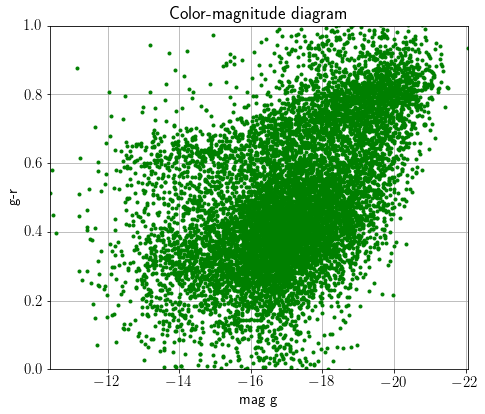

In [242]:
plt.figure(figsize=[7,6])
color = np.array(teste['g'] - teste['r'])

plt.plot(mag, color, 'g.')
    
plt.xlim(max(mag), min(mag))
plt.ylim(0, 1)

plt.title('Color-magnitude diagram')
plt.xlabel('mag g')
plt.ylabel('g-r')
plt.grid(True)
#plt.legend()
plt.tight_layout()

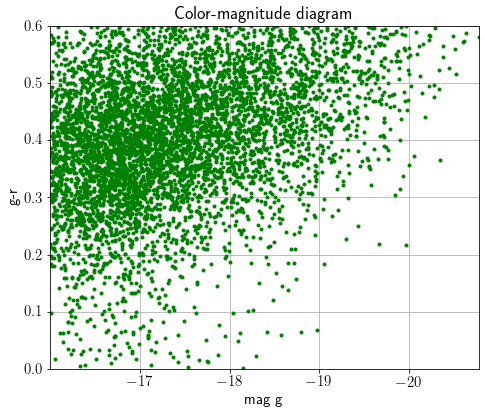

In [243]:
plt.figure(figsize=[7,6])
color = np.array(teste['g'] - teste['r'])

mask = (mag < (-16))&(color < 0.6)&(color > 0.0)

mag = mag[mask]
color = color[mask]
plt.plot(mag, color, 'g.')
    
plt.xlim(max(mag), min(mag))
plt.ylim(0, 0.6)

plt.title('Color-magnitude diagram')
plt.xlabel('mag g')
plt.ylabel('g-r')
plt.grid(True)
#plt.legend()
plt.tight_layout()

vii

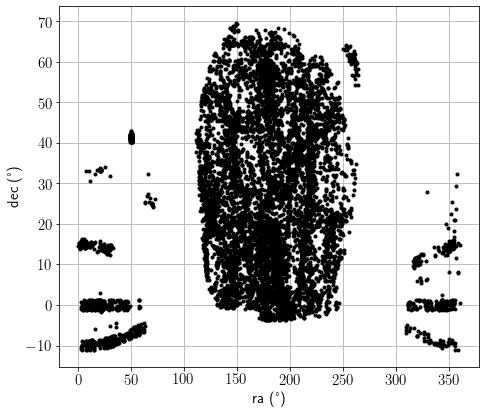

In [244]:
plt.figure(figsize=[7,6])
ra = np.array(teste['ra'])
dec = np.array(teste['dec'])
plt.plot(ra, dec, 'k.')

plt.xlabel('ra (°)')
plt.ylabel('dec (°)')
plt.grid(True)
#plt.legend()
plt.tight_layout()

limites: dec [-5, 70], ra [120, 260]

In [245]:
alpha1 = np.radians(120)
alpha2 = np.radians(260)
delta1 = np.radians(-5)
delta2 = np.radians(70)
omega = (alpha2 - alpha1) * (np.sin(delta2-delta1))
omega

2.360202039830746

In [246]:
dist_max = max(dist)
dist_max = dist_max/1e6 #Mpc
dist_max

85.711288

In [247]:
V = omega/3 * dist_max**3
V #Mpc³

495384.0173723243

In [258]:
mag_min = -22
mag_max = -16
Nbins = 60
dm = (mag_max - mag_min)/Nbins

m = np.empty(Nbins)
N = np.empty(Nbins)
phi = np.empty(Nbins)

for i in range(1, Nbins):
    m1 = i * dm + (-22)
    m2 = m1 + dm
    m1 = round(m1, 1)
    m2 = round(m2, 1)
    m[i] = (m1+m2)/2

    cond = np.argwhere((mag > m1) & (mag < m2)).flatten()
    pontos = mag[cond]
    N[i] = len(pontos)
    phi[i] = N[i]/(V*dm)

In [335]:
mask0 = (phi>0)&(m<0)&(m<-16.70) #excluindo pontos ruins para o fit
phi = phi[mask0]
m = m[mask0]

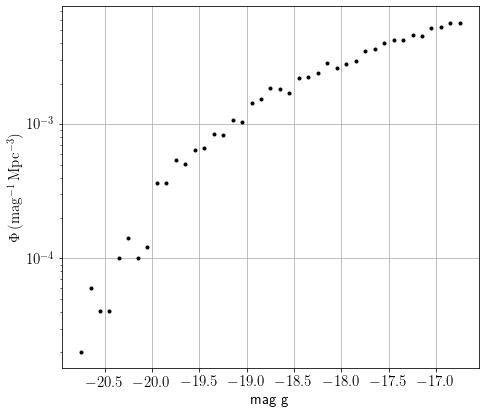

In [359]:
plt.figure(figsize=[7,6])
plt.plot(m, phi, 'k.')

plt.xlabel('mag g')
plt.ylabel('$\Phi \, (\mathrm{mag^{-1} \, Mpc^{-3}})$ ')
plt.yscale('log')
#plt.xlim(max(m)+0.5, min(m)-0.5)
plt.grid(True)
#plt.legend()
plt.tight_layout()

In [319]:
def schechter(m, phi_est, alpha, M_est):
    return ((0.4*np.log(10)) * phi_est * (10**(-0.4*(alpha+1)*(m-M_est))) * np.exp(-10**(-0.4*(m-M_est))))

0.002620878294042204 -1.4179595590601233 -19.286085601462535


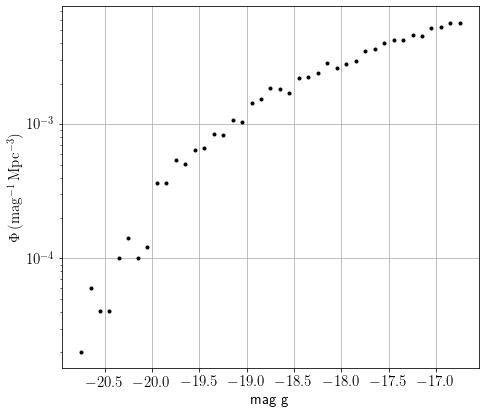

In [362]:
expected = (0.001, -1.0, -20.0) #a ordem de grandeza
params, cov = curve_fit(schechter, m, phi, expected)

phi_est = params[0]
M_est = params[1]
alpha = params[2]

print(phi_est, M_est, alpha)

fit = schechter(m, phi_est, alpha, M_est)

plt.figure(figsize=[7,6])
plt.plot(m, phi, 'k.', label='dados')
plt.plot(m, fit, 'g-', label='ajuste')
plt.xlabel('mag g')
plt.ylabel('$\Phi \, (\mathrm{mag^{-1} \, Mpc^{-3}})$ ')
plt.yscale('log')
#plt.xlim(max(m)+0.5, min(m)-0.5)
#plt.legend()
plt.grid(True)
plt.tight_layout()

In [358]:
print(round(phi_est, 3), round(M_est, 2), round(alpha, 2))

0.003 -1.42 -19.29


In [368]:
M = 18
M_sol = 4.83
L_sol = 1
L = L_sol * 10**((M - M_sol)/(-2.5))
print(L) #ergs/s

L_est = L/(10**(-0.4*(M - M_est)))
print(L_est) #Lsun

5.395106225151279e-06
315.6340323379762


por que o ajuste não aparece?

In [343]:
phi_est

0.002620878294042204

In [346]:
M_est

-1.4179595590601233

In [347]:
alpha

-19.286085601462535

In [345]:
m

array([-20.75, -20.65, -20.55, -20.45, -20.35, -20.25, -20.15, -20.05,
       -19.95, -19.85, -19.75, -19.65, -19.55, -19.45, -19.35, -19.25,
       -19.15, -19.05, -18.95, -18.85, -18.75, -18.65, -18.55, -18.45,
       -18.35, -18.25, -18.15, -18.05, -17.95, -17.85, -17.75, -17.65,
       -17.55, -17.45, -17.35, -17.25, -17.15, -17.05, -16.95, -16.85,
       -16.75])

In [348]:
y = ((0.4*np.log(10)) * phi_est * (10**(-0.4*(alpha+1)*(m-M_est))) * np.exp(-10**(-0.4*(m-M_est))))

In [349]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

ué